<center><h1>Gunadi_Eben_HW8</h1></center>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import defaultdict
from sklearn.cluster import KMeans, SpectralClustering
from spectralcluster import SpectralClusterer
from scipy.spatial import distance
from scipy.stats import mode
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
wdbc_filepath = '../data/wdbc.csv'

wdbc_header = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']


wdbc_df = pd.read_csv(wdbc_filepath, names=wdbc_header, index_col='id', delimiter=',', encoding='utf-8')

In [3]:
wdbc_df.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          mean_smoothness  mean_compactness  mean_concavity  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          mean_concave_points  mean_symmetry  ...  worst_radius  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          worst_texture  worst_perimeter  worst_area  worst_smoothness  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          worst_compactness  worst_concavity  worst_concave_points  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          worst_symmetry  worst_fractal_dimension  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

In [4]:
wdbc_df.shape

(569, 31)

### (b) Monte-Carlo Simulation

Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positive and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### (i) Supervised Learning

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

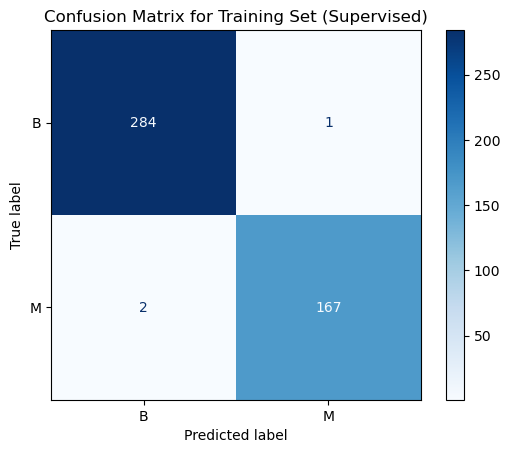

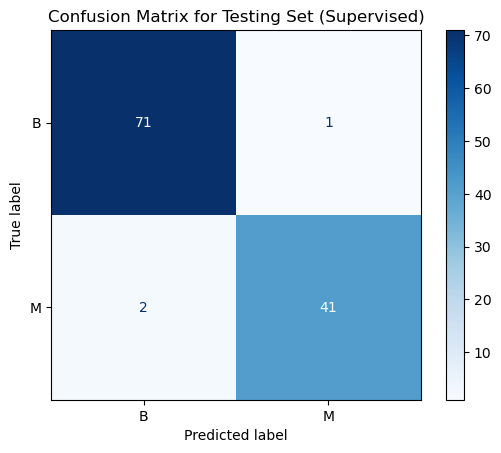

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [5]:
# Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

# Drop the diagnosis column
X = wdbc_df.drop('diagnosis', axis=1)
y = wdbc_df['diagnosis']

# Convert the diagnosis column to binary
y = y.map({'M': 1, 'B': 0})

# Repeat the experiment M = 30 times
M = 30

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list = []
test_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train an L1-penalized SVM to classify the data
    svm = LinearSVC(penalty='l1', dual=False)

    # Create a parameter grid for GridSearchCV
    param_grid = {'C': np.logspace(-4, 4, 9)}

    # Perform GridSearchCV with SVM and parameter grid to
    # determine weights of the SVM penalty (C)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from GridSearchCV
    best_params = grid_search.best_params_

    # Train the L1-penalized SVM with the best parameters
    best_svm = LinearSVC(penalty='l1', dual=False, C=best_params['C'])
    best_svm.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
    test_auc_list.append(test_auc)

    # Plot the ROC and report the confusion matrix for training and testing in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['B', 'M'], cmap='Blues') 
        
        plt.title('Confusion Matrix for Training Set (Supervised)')
        plt.show()
        
        cm_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Testing Set (Supervised)')
        plt.show()
        
        # Calculate probabilities for ROC curve
        y_train_prob = best_svm.decision_function(X_train)
        y_test_prob = best_svm.decision_function(X_test)

        # Calculate the ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

        roc_auc_train = auc(fpr_train, tpr_train)
        roc_auc_test = auc(fpr_test, tpr_test)

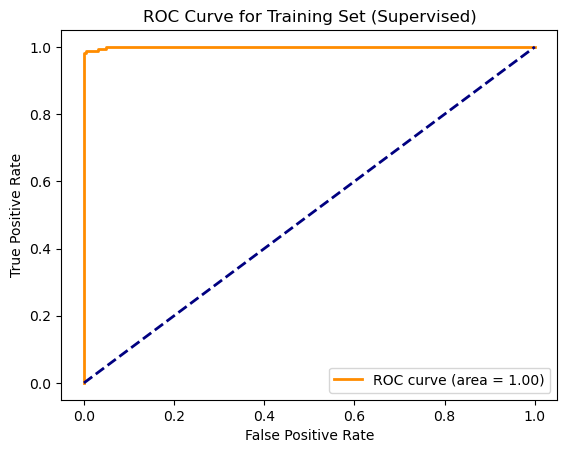

In [6]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Supervised)')
plt.legend(loc='lower right')
plt.show()

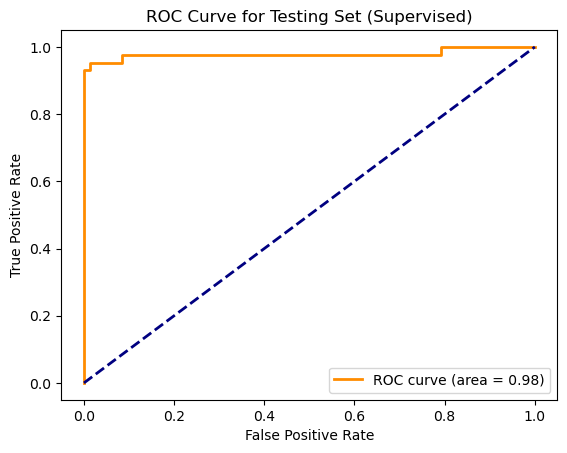

In [7]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (Supervised)')
plt.legend(loc='lower right')
plt.show()

In [8]:
# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs

supervised_learning_metrics = defaultdict(list)

supervised_learning_metrics['train_accuracy'] = train_accuracy_list
supervised_learning_metrics['train_precision'] = train_precision_list
supervised_learning_metrics['train_recall'] = train_recall_list
supervised_learning_metrics['train_f1_score'] = train_f1_score_list
supervised_learning_metrics['train_auc'] = train_auc_list

supervised_learning_metrics['test_accuracy'] = test_accuracy_list
supervised_learning_metrics['test_precision'] = test_precision_list
supervised_learning_metrics['test_recall'] = test_recall_list
supervised_learning_metrics['test_f1_score'] = test_f1_score_list
supervised_learning_metrics['test_auc'] = test_auc_list

supervised_learning_metrics_df = pd.DataFrame(supervised_learning_metrics)

supervised_train_metrics_avg = supervised_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()
supervised_test_metrics_avg = supervised_learning_metrics_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_auc']].mean()

print('Average Supervised Learning Metrics for Training Set')
print(supervised_train_metrics_avg)
print('\nAverage Supervised Learning Metrics for Testing Set')
print(supervised_test_metrics_avg)

Average Supervised Learning Metrics for Training Set
train_accuracy     0.987078
train_precision    0.991960
train_recall       0.973176
train_f1_score     0.982465
train_auc          0.984249
dtype: float64

Average Supervised Learning Metrics for Testing Set
test_accuracy     0.972174
test_precision    0.977558
test_recall       0.948062
test_f1_score     0.961898
test_auc          0.967318
dtype: float64


#### (ii) Semi-Supervised Learning/ Self-training

Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

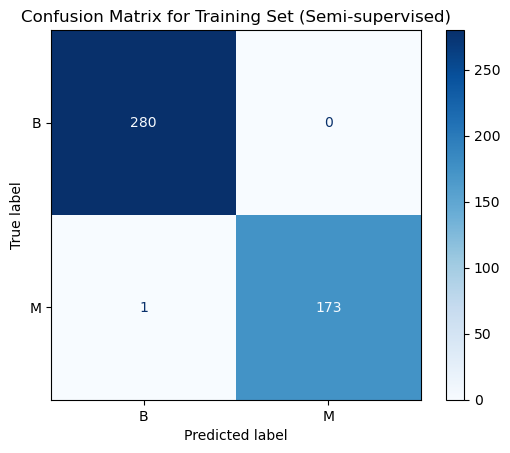

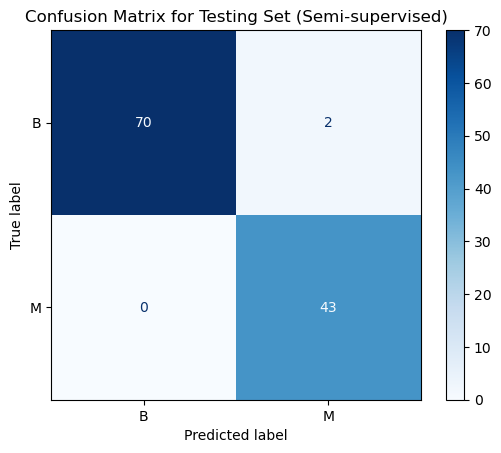

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [9]:
# (A) Train an L1-penalized SVM to classify the labeled data. Use normalized data. Choose the penalty parameter using 5 fold cross validation.

# (B) Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list = []
test_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    # Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
    X_train_pos, X_unlabeled_pos, y_train_pos, y_unlabeled_pos = train_test_split(X_train_pos, y_train_pos, test_size=0.5, random_state=i)
    X_train_neg, X_unlabeled_neg, y_train_neg, y_unlabeled_neg = train_test_split(X_train_neg, y_train_neg, test_size=0.5, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    X_unlabeled = pd.concat([X_unlabeled_pos, X_unlabeled_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])
    y_unlabeled = pd.concat([y_unlabeled_pos, y_unlabeled_neg])

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_unlabeled = scaler.transform(X_unlabeled)

    # After scaling, convert X_train and X_unlabeled back to DataFrame for easier handling
    X_train = pd.DataFrame(X_train, index=y_train.index)  # Assuming y_train.index holds the correct indices
    X_unlabeled = pd.DataFrame(X_unlabeled, columns=X_train.columns)  # Use the same columns as X_train

    # Train an L1-penalized SVM to classify the data
    svm = LinearSVC(penalty='l1', dual=False)

    # Create a parameter grid for GridSearchCV
    param_grid = {'C': np.logspace(-4, 4, 9)}

    # Perform GridSearchCV with SVM and parameter grid to
    # determine weights of the SVM penalty (C)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from GridSearchCV
    best_params = grid_search.best_params_

    # Train the L1-penalized SVM with the best parameters
    best_svm = LinearSVC(penalty='l1', dual=False, C=best_params['C'])
    best_svm.fit(X_train, y_train)

    # Label the unlabeled data
    while len(X_unlabeled) > 0:
        # Find the unlabeled data point that is the farthest to the decision boundary of the SVM
        farthest_distance = -np.inf  # Reset for each iteration
        farthest_index = None

        for j in range(len(X_unlabeled)):
            # Calculate the distance of each unlabeled data point to the decision boundary
            distance_calculated = best_svm.decision_function([X_unlabeled.iloc[j]])[0]

            if distance_calculated > farthest_distance:
                farthest_distance = distance_calculated
                farthest_index = j

        # Label the unlabeled data point that is the farthest to the decision boundary of the SVM
        X_train = pd.concat([X_train, X_unlabeled.iloc[[farthest_index]]])
        y_train = pd.concat([y_train, pd.Series(best_svm.predict([X_unlabeled.iloc[farthest_index]]), index=[X_unlabeled.index[farthest_index]])])

        # Remove or mark this instance as used in `X_unlabeled`
        X_unlabeled = X_unlabeled.drop(X_unlabeled.index[farthest_index])

        # Retrain the L1-penalized SVM with the best parameters and the newly labeled data
        best_svm.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
    test_auc_list.append(test_auc)

    # Plot the ROC and report the confusion matrix for training and testing in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Training Set (Semi-supervised)')
        plt.show()

        cm_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Testing Set (Semi-supervised)')
        plt.show()

        # Calculate probabilities for ROC curve
        y_train_prob = best_svm.decision_function(X_train)
        y_test_prob = best_svm.decision_function(X_test)

        # Calculate the ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

        roc_auc_train = auc(fpr_train, tpr_train)
        roc_auc_test = auc(fpr_test, tpr_test)

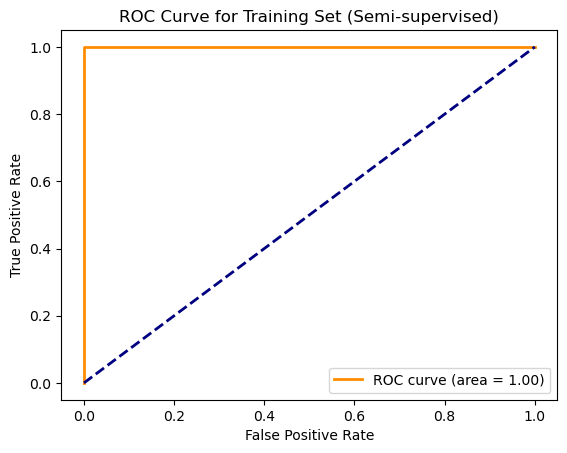

In [10]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Semi-supervised)')
plt.legend(loc='lower right')
plt.show()

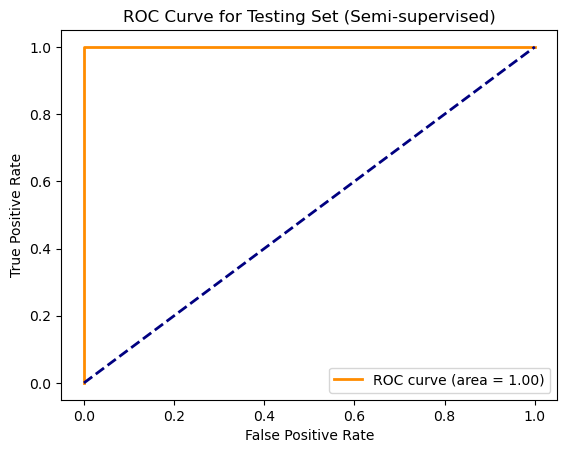

In [11]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (Semi-supervised)')
plt.legend(loc='lower right')
plt.show()

In [12]:
# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs

semi_supervised_learning_metrics = defaultdict(list)

semi_supervised_learning_metrics['train_accuracy'] = train_accuracy_list
semi_supervised_learning_metrics['train_precision'] = train_precision_list
semi_supervised_learning_metrics['train_recall'] = train_recall_list
semi_supervised_learning_metrics['train_f1_score'] = train_f1_score_list
semi_supervised_learning_metrics['train_auc'] = train_auc_list

semi_supervised_learning_metrics['test_accuracy'] = test_accuracy_list
semi_supervised_learning_metrics['test_precision'] = test_precision_list
semi_supervised_learning_metrics['test_recall'] = test_recall_list
semi_supervised_learning_metrics['test_f1_score'] = test_f1_score_list
semi_supervised_learning_metrics['test_auc'] = test_auc_list

semi_supervised_learning_metrics_df = pd.DataFrame(semi_supervised_learning_metrics)

semi_supervised_train_metrics_avg = semi_supervised_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()
semi_supervised_test_metrics_avg = semi_supervised_learning_metrics_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_auc']].mean()

print('Average Semi-supervised Learning Metrics for Training Set')
print(semi_supervised_train_metrics_avg)
print('\nAverage Semi-supervised Learning Metrics for Testing Set')
print(semi_supervised_test_metrics_avg)

Average Semi-supervised Learning Metrics for Training Set
train_accuracy     0.991850
train_precision    0.994310
train_recall       0.984061
train_f1_score     0.989135
train_auc          0.990314
dtype: float64

Average Semi-supervised Learning Metrics for Testing Set
test_accuracy     0.966957
test_precision    0.956822
test_recall       0.955814
test_f1_score     0.955726
test_auc          0.964713
dtype: float64


#### (iii) Unsupervised Learning

Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


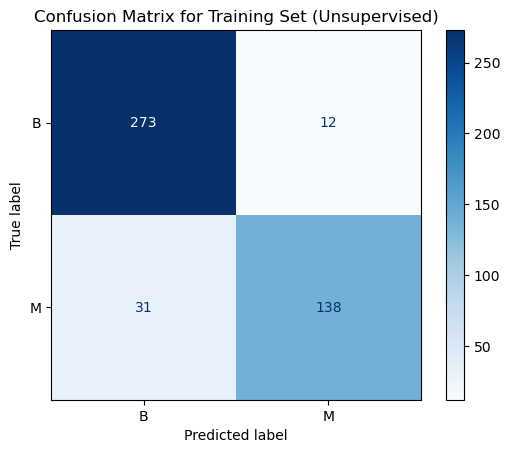

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/clus

In [13]:
# (A) Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

# (B) Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

# Per footnote 2:
# K-means algorithm does not provide probabilities, so one can use the distances from cluster center and pass them through a softmax to calculate probabilities. Alternatively, one can calculate the ROC curve by varying the threshold for majority polling. Usually, a majority is achieved when t = 50% of the data are in a class. One can vary t and obtain an ROC curve.

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data while keeping it as a DataFrame
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=2, random_state=i)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    labels = np.zeros_like(kmeans.labels_)
 
    for j in range(2): # For each cluster
        # Calculate distances of all points to the cluster center
        cluster_dist = distance.cdist(X_train, [centers[j]])

        # Get indices of 30 closest points
        closest_indices = np.argsort(cluster_dist.ravel())[:30]
        closest_points = X_train.index[closest_indices]

        # Majority vote
        vote_result = mode(y_train.loc[closest_points])
        label = vote_result.mode

        # Assign this label to all points in the cluster
        labels[kmeans.labels_ == j] = label

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training set
    train_accuracy = accuracy_score(y_train, labels)
    train_precision = precision_score(y_train, labels)
    train_recall = recall_score(y_train, labels)
    train_f1_score = f1_score(y_train, labels)
    train_auc = roc_auc_score(y_train, labels)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    # Plot the ROC and report the confusion matrix for training in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, labels, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Training Set (Unsupervised)')
        plt.show()

        # Compute distances to cluster centers
        distances = kmeans.transform(X_train)

        # Apply softmax to negative distances (since closer points should have higher "probability")
        probabilities = softmax(-distances, axis=1)

        # Use probabilities corresponding to the "positive" cluster for ROC curve calculation
        positive_cluster_index = 0 if np.mean(labels[kmeans.labels_ == 0]) > 0.5 else 1
        y_scores = probabilities[:, positive_cluster_index]

        # Calculate the ROC curve and AUC using these scores
        fpr_train, tpr_train, _ = roc_curve(y_train, y_scores)
        roc_auc_train = auc(fpr_train, tpr_train)     

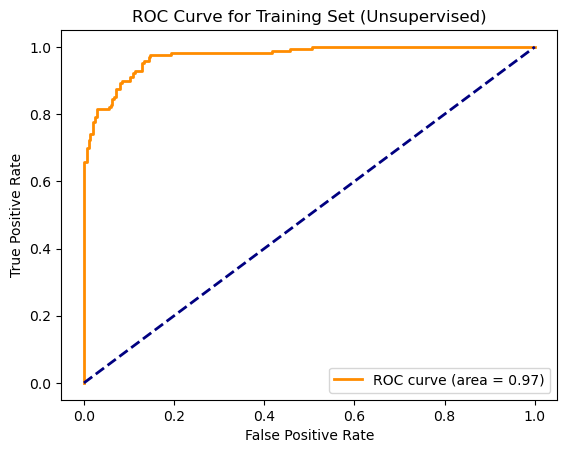

In [14]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Unsupervised)')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Report the average accuracy, precision, recall, F1-score, and AUC for the training set over your M runs

unsupervised_learning_metrics = defaultdict(list)

unsupervised_learning_metrics['train_accuracy'] = train_accuracy_list
unsupervised_learning_metrics['train_precision'] = train_precision_list
unsupervised_learning_metrics['train_recall'] = train_recall_list
unsupervised_learning_metrics['train_f1_score'] = train_f1_score_list
unsupervised_learning_metrics['train_auc'] = train_auc_list

unsupervised_learning_metrics_df = pd.DataFrame(unsupervised_learning_metrics)

unsupervised_train_metrics_avg = unsupervised_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()

print('Average Unsupervised Learning Metrics for Training Set')
print(unsupervised_train_metrics_avg)

Average Unsupervised Learning Metrics for Training Set
train_accuracy     0.908811
train_precision    0.920725
train_recall       0.826627
train_f1_score     0.870922
train_auc          0.892086
dtype: float64


Local minimum is avoided by running this process multiple times with randomized initialization parameters.

#### (iv) Spectral Clustering

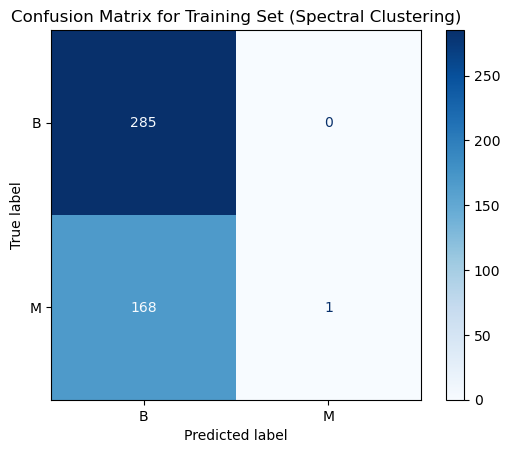

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebengunadi/anaconda3/

In [16]:
# Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clusters have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

# Per footnote 3:
# Because Spectral Clustering will not give you cluster centers, instead of considering 30 closest data points to the center, consider labeling based on either 30 randomly selected data points or the entire points in each cluster. Also, for ROC curves, you can vary the threshold of majority polling to obtain an ROC.

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data while keeping it as a DataFrame
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    # Perform Spectral Clustering
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=i)
    labels_spectral = spectral.fit_predict(X_train)

    # Convert labels_spectral to a DataFrame for easier manipulation
    labels_df = pd.DataFrame(labels_spectral, columns=['Cluster'], index=X_train.index)

    # Join with the true labels for majority polling
    clustered_data = labels_df.join(y_train.rename('TrueLabel'))

    # Determine the majority label for each cluster
    majority_labels = clustered_data.groupby('Cluster')['TrueLabel'].agg(lambda x: x.mode()[0])

    # Map the majority labels back to the original labels
    # Note: labels_assigned contains the adjusted labels based on majority polling within each cluster
    labels_assigned = labels_df['Cluster'].map(majority_labels)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training set
    train_accuracy = accuracy_score(y_train, labels_assigned)
    train_precision = precision_score(y_train, labels_assigned)
    train_recall = recall_score(y_train, labels_assigned)
    train_f1_score = f1_score(y_train, labels_assigned)
    train_auc = roc_auc_score(y_train, labels_assigned)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    # Plot the ROC and report the confusion matrix for training in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, labels_assigned, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Training Set (Spectral Clustering)')
        plt.show()

        # Calculate probabilities for ROC curve
        distances = spectral.affinity_matrix_
        probabilities = softmax(-distances, axis=1)

        # Use probabilities corresponding to the "positive" cluster for ROC curve calculation
        positive_cluster_index = 0 if np.mean(labels_assigned) > 0.5 else 1
        y_scores = probabilities[:, positive_cluster_index]

        # Calculate the ROC curve and AUC using these scores
        fpr_train, tpr_train, _ = roc_curve(y_train, y_scores)
        roc_auc_train = auc(fpr_train, tpr_train)



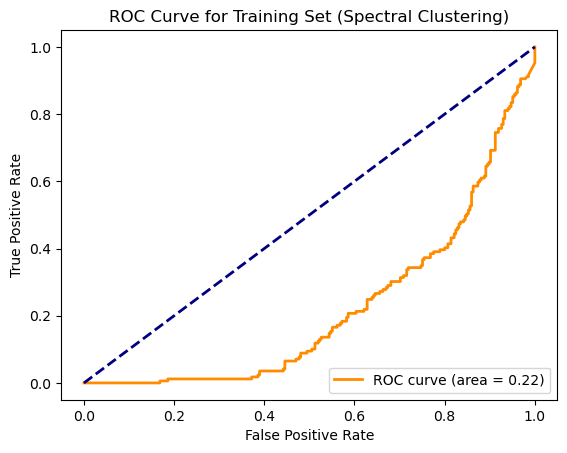

In [17]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Spectral Clustering)')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Report the average accuracy, precision, recall, F1-score, and AUC for the training set over your M runs

spectral_learning_metrics = defaultdict(list)

spectral_learning_metrics['train_accuracy'] = train_accuracy_list
spectral_learning_metrics['train_precision'] = train_precision_list
spectral_learning_metrics['train_recall'] = train_recall_list
spectral_learning_metrics['train_f1_score'] = train_f1_score_list
spectral_learning_metrics['train_auc'] = train_auc_list

spectral_learning_metrics_df = pd.DataFrame(spectral_learning_metrics)

spectral_train_metrics_avg = spectral_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()

print('Average Spectral Learning Metrics for Training Set')
print(spectral_train_metrics_avg)

Average Spectral Learning Metrics for Training Set
train_accuracy     0.630543
train_precision    0.800000
train_recall       0.007495
train_f1_score     0.014838
train_auc          0.503748
dtype: float64


#### (v) Compare

As expected, supervised learning had the highest accuracy, having a mean test accuracy of 0.972754. Semi-supervised and unsupervised came in second and third, with a respective mean test accuracy of 0.969565 and mean train accuracy of 0.908811. Spectral clustering was horrendous, failing to even identify a substantial amount of true positives. Perhaps the implementation is faulty, but please note that I spent many hours researching, refactoring the code, and testing various parameters.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [19]:
# Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

banknote_filepath = '../data/data_banknote_authentication.csv'

banknote_header = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

banknote_df = pd.read_csv(banknote_filepath, names=banknote_header, delimiter=',', encoding='utf-8')

In [20]:
banknote_df.head()

variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [21]:
banknote_df.shape

(1372, 5)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(banknote_df.drop('class', axis=1), banknote_df['class'], test_size=472, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 4)
(472, 4)
(900,)
(472,)


### (b) Repeat each of the following two procedures 50 times

You will have 50 errors for 90 SVMs per each procedure.

#### (i) Passive

In [30]:
# Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

# Per footnote 4:
# To choose parameter ranges for SVMs, train the SVM with very large and very small parameters on the whole training data and find very large and very small parameters for which the training accuracy is not below a threshold (e.g., 70%). Then one can select a fixed number of parameters (e.g., 20) between those points for cross validation. 
# For the penalty parameter, usually one has to consider increments in log(λ). For example, if one found that the accuracy of a support vector machine will not be below 70% for λ = 10−3 and λ = 106, one has to choose log(λ) ∈ {−3, −2, . . . , 4, 5, 6}. For the Gaussian Kernel parameter, one usually chooses linear increments, e.g. σ ∈ {.1, .2, . . . , 2}. When both σ and λ are to be chosen using cross-validation, combinations of very small and very large λ’s and σ’s that keep the accuracy above a threshold (e.g.70%) can be used to determine the ranges for σ and λ. Please note that these are very rough rules of thumb, not general procedures.

def svm_best_params(X_train, y_train, threshold_accuracy=0.7):
    """
    Finds the best penalty parameter C for an SVM with a linear kernel and L1 penalty
    using cross-validation, based on training accuracy thresholds.

    Parameters:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        threshold_accuracy (float): Accuracy threshold to determine C range.

    Returns:
        float: The best penalty parameter C.
    """
    # Train with very large and very small C values
    svm_large = LinearSVC(penalty='l1', dual=False, C=1e6)
    svm_large.fit(X_train, y_train)
    large_accuracy = accuracy_score(y_train, svm_large.predict(X_train))

    svm_small = LinearSVC(penalty='l1', dual=False, C=1e-3)
    svm_small.fit(X_train, y_train)
    small_accuracy = accuracy_score(y_train, svm_small.predict(X_train))

    # Initialize C range based on the above accuracies
    C_min = 1e-3 if small_accuracy >= threshold_accuracy else 1e-6
    C_max = 1e6 if large_accuracy >= threshold_accuracy else 1e3

    # Generate a log-spaced range of C values
    C_values = np.logspace(np.log10(C_min), np.log10(C_max), num=20)

    # GridSearchCV to find the best C value
    svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    param_grid = {'C': C_values}
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Return the best parameter C found
    best_C = grid_search.best_params_['C']
    return best_C


> Note: If re-running this notebook, no need to run the commented out code below from scratch since they have been run with results outputted to 'data/svm_errors_passive.csv'. Running the code from scratch takes more than 30 minutes to complete on a laptop.

In [33]:
"""
n_repeats = 50
n_models = 90  # 90 models from 10 to 900 data points

# Initialize an empty DataFrame
column_names = [f'{10 * i} datapoints' for i in range(1, n_models + 1)]
errors_df = pd.DataFrame(index=range(n_repeats), columns=column_names)

for repeat in range(n_repeats):
    indices = np.random.permutation(len(X_train))
    for i in range(1, n_models + 1):  # Incrementing from 10 to 900 in steps of 10
        subset_size = 10 * i
        subset_indices = indices[:subset_size]
        
        # Correct slicing for pandas DataFrame or Series
        X_train_subset = X_train.iloc[subset_indices]
        y_train_subset = y_train.iloc[subset_indices]

        # Get best C using the svm_best_params function
        best_C = svm_best_params(X_train_subset, y_train_subset)
        
        # Train and evaluate SVM
        svm = LinearSVC(penalty='l1', dual=False, C=best_C)
        svm.fit(X_train_subset, y_train_subset)
        test_error = 1 - accuracy_score(y_test, svm.predict(X_test))
        
        # Correctly store the test error in the DataFrame
        errors_df.iloc[repeat, i-1] = test_error  # Use iloc for integer-location based indexing
    
errors_df.to_csv('../data/svm_errors_passive.csv', encoding='utf-8', index=False)
"""

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [39]:
passive_errors_df = pd.read_csv('../data/svm_errors_passive.csv', delimiter=',', encoding='utf-8')

#### (ii) Active

In [43]:
# Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

# Per footnote 5:
# If all selected data points are from one class, select another set of 10 data points randomly.

# Per footnote 6:
# You may use the result from linear algebra about the distance of a point from a hyperplane.

> Note: If re-running this notebook, no need to run the commented out code below from scratch since they have been run with results outputted to 'data/svm_errors_active.csv'. Running the code from scratch takes almost 30 minutes to complete on a laptop.

In [ ]:
"""
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

n_repeats = 50
n_models = 90  # 90 models from 10 to 900 data points
initial_size = 10
step_size = 10

# Initialize an empty DataFrame with specified column names
column_names = [f'{10 * i} datapoints' for i in range(1, n_models + 1)]
errors_df = pd.DataFrame(index=range(n_repeats), columns=column_names)

for repeat in range(n_repeats):
    indices = np.random.permutation(len(X_train))
    train_indices = []
    test_indices = list(indices)  # Initially, all indices are test candidates
    class_collected = set()

    # Ensure diverse initial training set
    for idx in indices:
        if len(train_indices) < initial_size:
            current_class = y_train.loc[idx]
            if current_class not in class_collected:
                train_indices.append(idx)
                class_collected.add(current_class)
            # Once two classes are collected, fill up to initial_size without class restriction
            elif len(class_collected) >= 2:
                train_indices.append(idx)
        if len(train_indices) >= initial_size:
            break
    
    # Remove the selected initial indices from test_indices
    test_indices = [idx for idx in test_indices if idx not in train_indices]

    # Training loop
    for i in range(1, n_models + 1):
        subset_size = 10 * i
        X_train_subset = X_train.iloc[train_indices]
        y_train_subset = y_train.iloc[train_indices]
        
        # Train SVM
        svm = LinearSVC(penalty='l1', dual=False, C=svm_best_params(X_train_subset, y_train_subset))
        svm.fit(X_train_subset, y_train_subset)

        # If there is room to add more data, add data points closest to the hyperplane
        if subset_size > len(train_indices) and test_indices:
            distances = np.abs(svm.decision_function(X_train.iloc[test_indices]))
            closest_indices = np.argsort(distances)[:min(step_size, len(test_indices))]
            for idx in closest_indices:
                train_indices.append(test_indices[idx])
            # Update test indices by removing added train indices
            test_indices = [idx for idx in test_indices if idx not in train_indices]

        # Evaluate the model on the test set
        test_error = 1 - accuracy_score(y_test, svm.predict(X_test))
        # Store the error in the DataFrame
        errors_df.iloc[repeat, i-1] = test_error

errors_df.to_csv('../data/svm_errors_active.csv', encoding='utf-8', index=False)
"""

In [44]:
active_errors_df = pd.read_csv('../data/svm_errors_active.csv', delimiter=',', encoding='utf-8')

### (c) Average the 50 test errors

In [50]:
# Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

# Calculate the average test error for each model
passive_errors_avg = passive_errors_df.mean()
active_errors_avg = active_errors_df.mean()

print("Average test errors for passive learning:")
print(passive_errors_avg)

print("\nAverage test errors for active learning:")
print(active_errors_avg)

Average test errors for passive learning:
10 datapoints     0.129025
20 datapoints     0.073475
30 datapoints     0.045890
40 datapoints     0.033856
50 datapoints     0.029492
                    ...   
860 datapoints    0.012839
870 datapoints    0.012712
880 datapoints    0.012712
890 datapoints    0.012839
900 datapoints    0.012839
Length: 90, dtype: float64

Average test errors for active learning:
10 datapoints     0.139915
20 datapoints     0.138178
30 datapoints     0.058644
40 datapoints     0.037627
50 datapoints     0.021186
                    ...   
860 datapoints    0.013941
870 datapoints    0.014195
880 datapoints    0.014449
890 datapoints    0.014534
900 datapoints    0.014915
Length: 90, dtype: float64


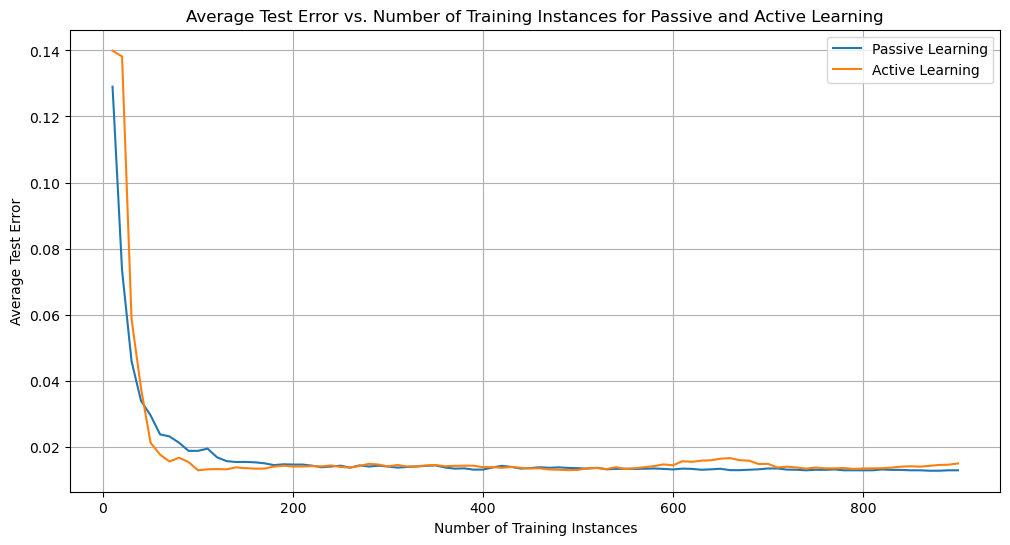

In [51]:
# Plot the average test error versus number of training instances for both active and passive learners
plt.figure(figsize=(12, 6))
plt.plot(range(10, 901, 10), passive_errors_avg, label='Passive Learning')
plt.plot(range(10, 901, 10), active_errors_avg, label='Active Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Average Test Error vs. Number of Training Instances for Passive and Active Learning')
plt.legend()
plt.grid(True)
plt.show()

## References and Citations

- https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
- https://stackoverflow.com/questions/70106288/what-is-the-relationship-between-classification-report-and-precision-score
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html
- https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/
- https://stackoverflow.com/questions/40658486/impossible-to-set-the-gamma-parameter-for-the-spectral-clustering-function-in-sk
- https://pypi.org/project/spectralcluster/
- https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf (Chapter 9)